# Facebook Ad-Campaign Analysis

### Loading of data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('sales-data.csv')

### Viewing the numbers

In [119]:
df.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,campaign_1,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,campaign_1,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,campaign_1,103920,30-34,M,20,693,0,0.00,1,0


In [3]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


### Checking for null values and cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [5]:
df.shape

(1143, 11)

Since there are 1143 non-null values in each column and there are 1143 columns, then there are no null values

### Finding categorical columns and numerical columns

In [6]:
categorical_columns = [cname for cname in df.columns if df[cname].dtype == 'object']
categorical_columns

['age', 'gender']

But the interest is also categorical despite being a numerical value

In [7]:
categorical_columns.append('interest')
categorical_columns

['age', 'gender', 'interest']

In [8]:
df.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0


In [9]:
numerical_columns = [cname for cname in df.columns if (df[cname].dtype != 'object') and (cname != 'interest')]
numerical_columns

['ad_id',
 'xyz_campaign_id',
 'fb_campaign_id',
 'Impressions',
 'Clicks',
 'Spent',
 'Total_Conversion',
 'Approved_Conversion']

### Finding correlations in the data

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

correlation_columns = [cname for cname in numerical_columns if cname not in ['ad_id', 'xyz_campaign_id', 'fb_campaign_id']]
correlation_columns

['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']

<AxesSubplot:>

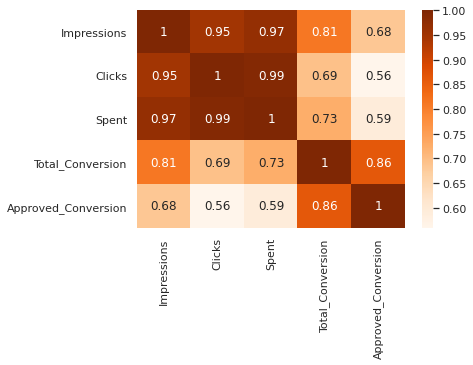

In [11]:
sns.heatmap(df[correlation_columns].corr(), annot=True, cmap='Oranges')

So as expected there is a high correlation between the amount spent on the ad and the impressions, as Facebook will display it to more people

### Distributions of the data

Text(0.5, 1.0, 'Density of total conversions')

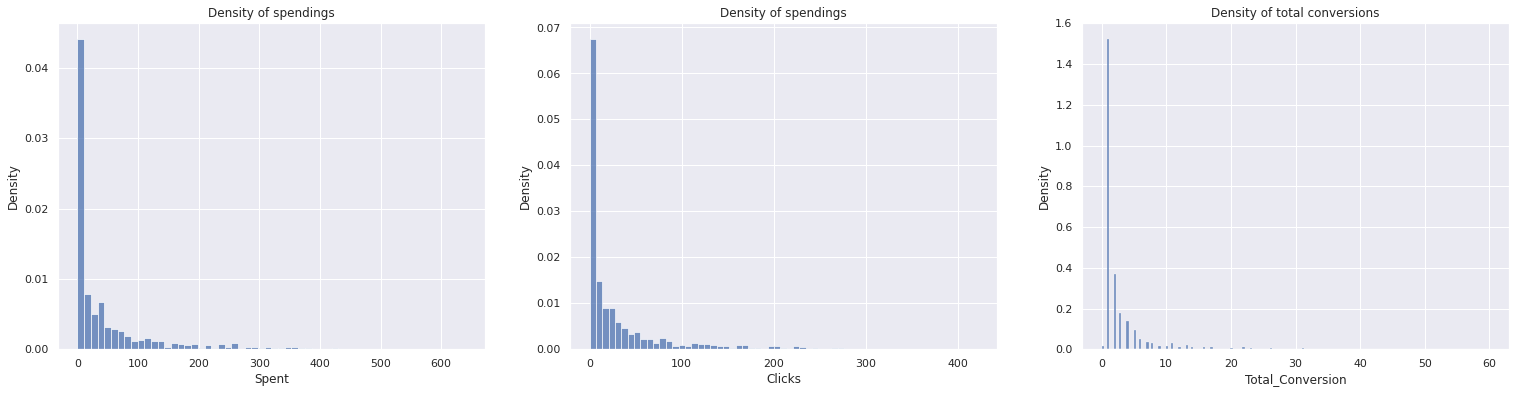

In [12]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(26, 6)

spent_densityplt = sns.histplot(df['Spent'], stat='density', ax=axs[0])
spent_densityplt.set_title('Density of spendings')

spent_densityplt = sns.histplot(df['Clicks'], stat='density', ax=axs[1])
spent_densityplt.set_title('Density of spendings')

spent_densityplt = sns.histplot(df['Total_Conversion'], stat='density', ax=axs[2])
spent_densityplt.set_title('Density of total conversions')

For the three distributions of data, the ad data appears to cluster around 0. This means that the most ads are cheap, yield low clicks, and yield a low amount of conversions.

### Analyzing the campaigns

In [13]:
df['xyz_campaign_id'].unique()

array([ 916,  936, 1178])

So we see that there were only 3 campaigns run during the experiment.

In [14]:
df['xyz_campaign_id'] = df['xyz_campaign_id'].replace({916: 'campaign_1', 936: 'campaign_2', 1178: 'campaign_3'})

Let's group by the sum of the element's for all the campaigns.

In [15]:
grouped_campaigns_sum = df.groupby('xyz_campaign_id').sum()
grouped_campaigns_sum['xyz_campaign_id'] = grouped_campaigns_sum.index
grouped_campaigns_sum

,ad_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,xyz_campaign_id
xyz_campaign_id,,,,,,,,,
campaign_1,38333977,5621757,1187,482925,113,149.710001,58,24,campaign_1
campaign_2,370765340,53545736,11622,8128187,1984,2893.369999,537,183,campaign_2
campaign_3,719340155,93747607,24643,204823716,36068,55662.149959,2669,872,campaign_3


Text(0.5, 1.0, 'Number of clicks each campaign')

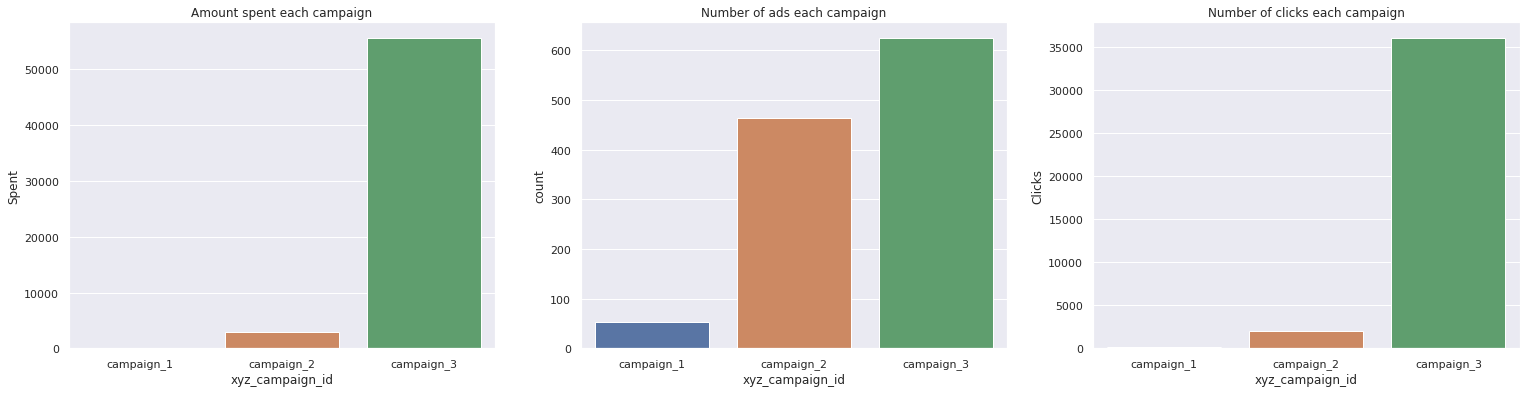

In [16]:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(26, 6)

costplt = sns.barplot(x='xyz_campaign_id', y='Spent', data=grouped_campaigns_sum, ci=None, ax=axs[0])
costplt.set_title('Amount spent each campaign')

countplt = sns.countplot(x='xyz_campaign_id', data=df, ax=axs[1])
countplt.set_title('Number of ads each campaign')

impressionplt = sns.barplot(x='xyz_campaign_id', y='Clicks', data=grouped_campaigns_sum, ci=None, ax=axs[2])
impressionplt.set_title('Number of clicks each campaign')

It can be seen that campaign 3 spent the most on their ads, and also bought the most amount of ads. Campaign 3 was also the campaign that got the most amount of clicks by far compared to the other campaigns.

Group by the count of every item from each campaign.

In [17]:
grouped_campaigns_count = df.groupby('xyz_campaign_id').count()
grouped_campaigns_count

,ad_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
xyz_campaign_id,,,,,,,,,,
campaign_1,54,54,54,54,54,54,54,54,54,54
campaign_2,464,464,464,464,464,464,464,464,464,464
campaign_3,625,625,625,625,625,625,625,625,625,625


TypeError: scatter() missing 1 required positional argument: 'y'

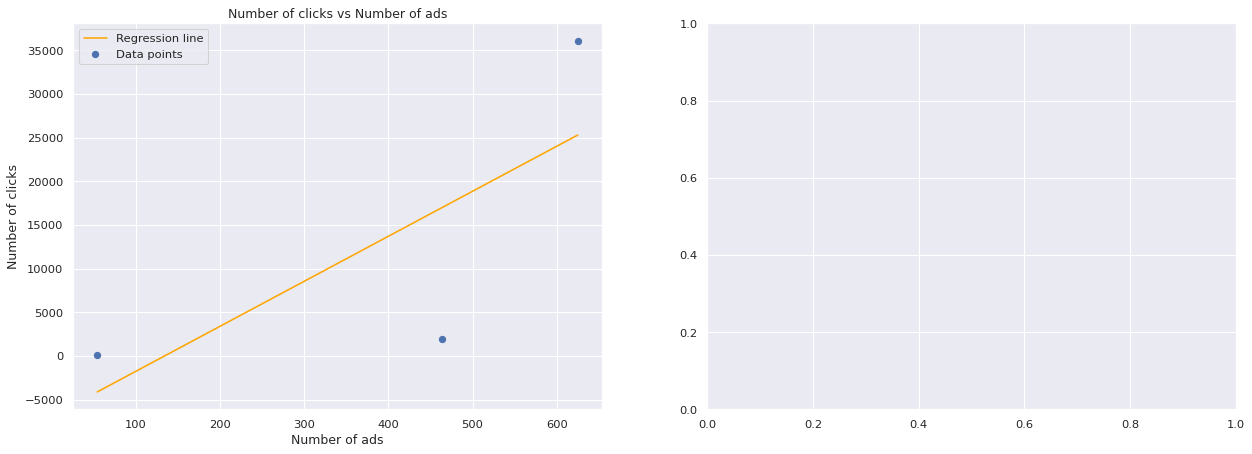

In [116]:
fig = plt.figure(figsize=(20,15), dpi=75)

ax = plt.subplot2grid((2,2),(0,0))
plt.scatter(grouped_campaigns_count['Clicks'], grouped_campaigns_sum['Clicks'], label='Data points')
m, b = np.polyfit(grouped_campaigns_count['Clicks'], grouped_campaigns_sum['Clicks'], 1)
plt.plot(grouped_campaigns_count['Clicks'], grouped_campaigns_count['Clicks'] * m + b, color='orange', label='Regression line')
plt.xlabel('Number of ads')
plt.ylabel('Number of clicks')
plt.title('Number of clicks vs Number of ads')
plt.legend()

ax = plt.subplot2grid((2,2),(0,1))
plt.scatter(df['', df['Clicks'])

It appears that there is a possible positive linear trend between the number of ads and the number of clicks however there is not enough data to further investigate this correlation

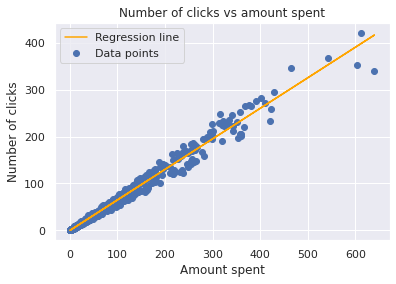

In [19]:
plt.scatter(df['Spent'], df['Clicks'], label='Data points')

m, b = np.polyfit(df['Spent'], df['Clicks'], 1)
plt.plot(df['Spent'], df['Spent'] * m + b, color='orange', label='Regression line')

plt.xlabel('Amount spent')
plt.ylabel('Number of clicks')
plt.title('Number of clicks vs amount spent')
plt.legend()

It can be seen that there is a strong positive linear trend between the amount spent and the number of impressions from a large amount of data points

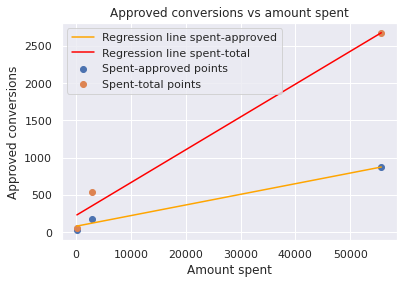

In [20]:
plt.scatter(grouped_campaigns_sum['Spent'], grouped_campaigns_sum['Approved_Conversion'], label='Spent-approved points')
plt.scatter(grouped_campaigns_sum['Spent'], grouped_campaigns_sum['Total_Conversion'], label='Spent-total points')

m, b = np.polyfit(grouped_campaigns_sum['Spent'], grouped_campaigns_sum['Approved_Conversion'], 1)
plt.plot(grouped_campaigns_sum['Spent'], grouped_campaigns_sum['Spent'] * m + b, color='orange', label='Regression line spent-approved')

m, b = np.polyfit(grouped_campaigns_sum['Spent'], grouped_campaigns_sum['Total_Conversion'], 1)
plt.plot(grouped_campaigns_sum['Spent'], grouped_campaigns_sum['Spent'] * m + b, color='red', label='Regression line spent-total')

plt.xlabel('Amount spent')
plt.ylabel('Approved conversions')
plt.title('Approved conversions vs amount spent')
plt.legend()

It appears that there is a positive linear relationship between the amount spent on ads and the approved conversions and the amount spent on ads vs the total conversions however there is not enough data to further test this correlation

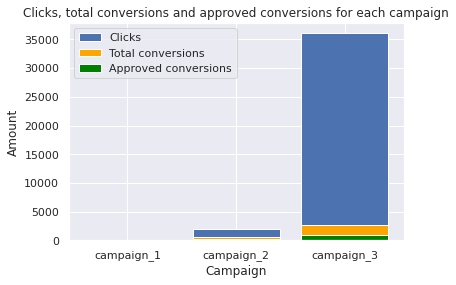

In [21]:
plt.bar(grouped_campaigns_sum['xyz_campaign_id'], grouped_campaigns_sum['Clicks'], color='b', label='Clicks')
plt.bar(grouped_campaigns_sum['xyz_campaign_id'], grouped_campaigns_sum['Total_Conversion'], color='orange', label='Total conversions')
plt.bar(grouped_campaigns_sum['xyz_campaign_id'], grouped_campaigns_sum['Approved_Conversion'], color='green', label='Approved conversions')
plt.xlabel('Campaign')
plt.ylabel('Amount')
plt.title('Clicks, total conversions and approved conversions for each campaign')
plt.legend()

##### Since the impressions is so much greater it is hard to visualize the comparison between the clicks, total conversions and approved conversions, let's just plot total conversions vs approved conversions down here

Text(0.5, 1.0, 'Conversion rate for each campaign')

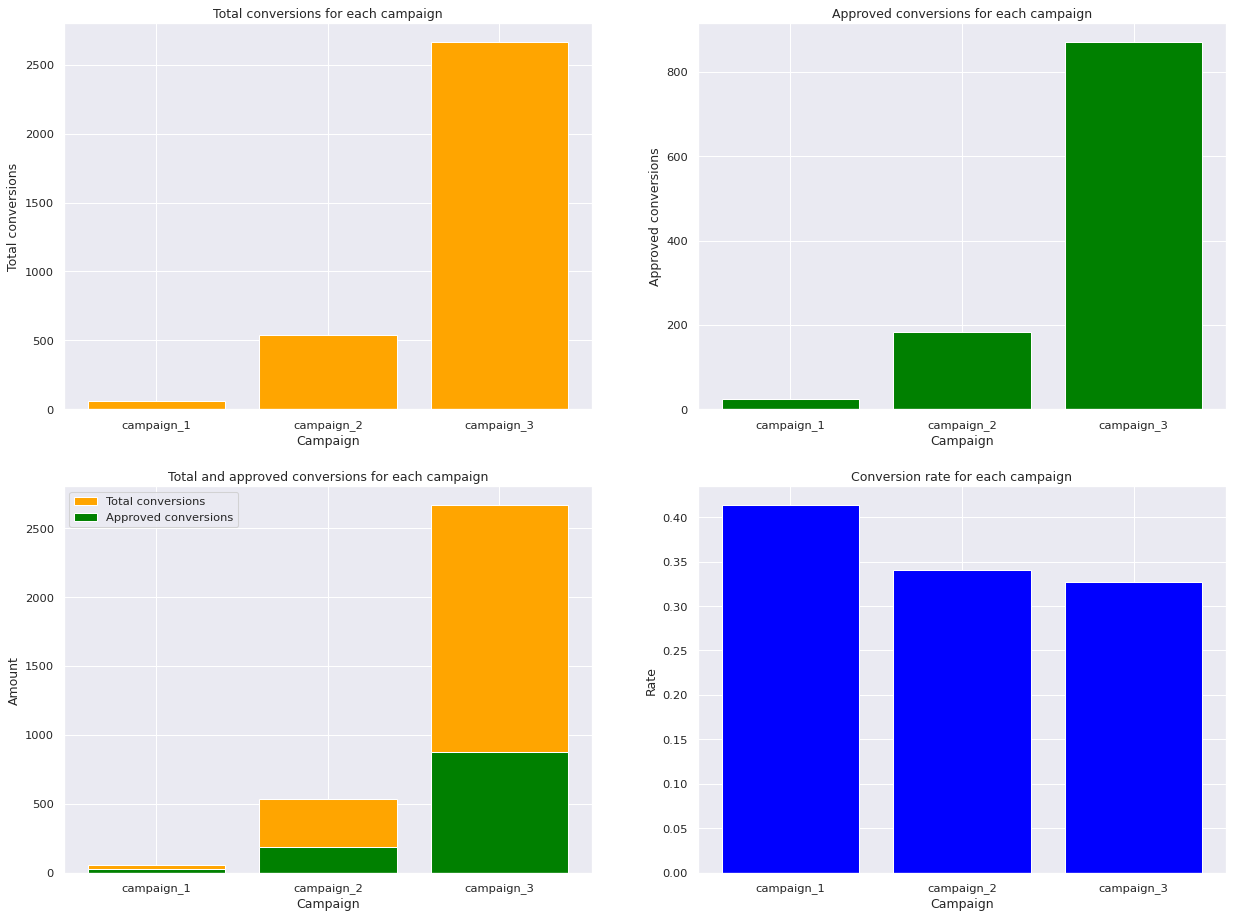

In [22]:
fig = plt.figure(figsize=(20,15), dpi=75)

ax = plt.subplot2grid((2,2),(0,0))
plt.bar(grouped_campaigns_sum['xyz_campaign_id'], grouped_campaigns_sum['Total_Conversion'], color='orange', label='Total conversions')
plt.xlabel('Campaign')
plt.ylabel('Total conversions')
plt.title('Total conversions for each campaign')

ax = plt.subplot2grid((2,2),(0,1))
plt.bar(grouped_campaigns_sum['xyz_campaign_id'], grouped_campaigns_sum['Approved_Conversion'], color='green', label='Approved conversions')
plt.xlabel('Campaign')
plt.ylabel('Approved conversions')
plt.title('Approved conversions for each campaign')

ax = plt.subplot2grid((2,2),(1,0))
plt.bar(grouped_campaigns_sum['xyz_campaign_id'], grouped_campaigns_sum['Total_Conversion'], color='orange', label='Total conversions')
plt.bar(grouped_campaigns_sum['xyz_campaign_id'], grouped_campaigns_sum['Approved_Conversion'], color='green', label='Approved conversions')
plt.xlabel('Campaign')
plt.ylabel('Amount')
plt.title('Total and approved conversions for each campaign')
plt.legend()

ax = plt.subplot2grid((2,2),(1,1))
plt.bar(grouped_campaigns_sum['xyz_campaign_id'], grouped_campaigns_sum['Approved_Conversion'] / grouped_campaigns_sum['Total_Conversion'], color='blue', label='Approved conversions')
plt.xlabel('Campaign')
plt.ylabel('Rate')
plt.title('Conversion rate for each campaign')

The total conversions and approved conversions was highest for campaign 3. It was found that campaign_1 had the highest conversion rate despite having the lowest amount of ads and the lowest budget, followed by campaign_2. It is hypothesized this is because when a company has a limited budget they compensate by creating better quality ads, rather than companies that have much more money and can afford to display a lesser quality ad to a greater amount of people.

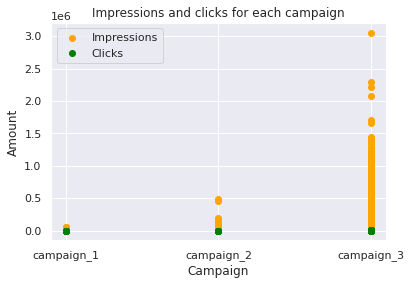

In [23]:
plt.scatter(df['xyz_campaign_id'], df['Impressions'], color='orange', label='Impressions')
plt.scatter(df['xyz_campaign_id'], df['Clicks'], color='green', label='Clicks')
plt.xlabel('Campaign')
plt.ylabel('Amount')
plt.title('Impressions and clicks for each campaign')
plt.legend()

Text(0.5, 1.0, 'Click rate for each campaign')

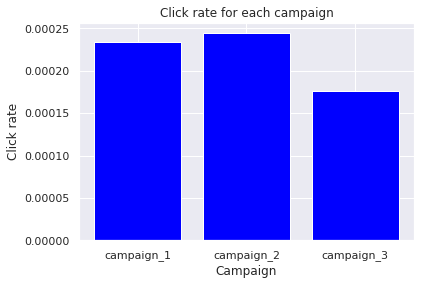

In [24]:
plt.bar(grouped_campaigns_sum['xyz_campaign_id'], grouped_campaigns_sum['Clicks'] / grouped_campaigns_sum['Impressions'], color='blue')
plt.xlabel('Campaign')
plt.ylabel('Click rate')
plt.title('Click rate for each campaign')

Text(0.5, 1.0, 'Distribution of age groups')

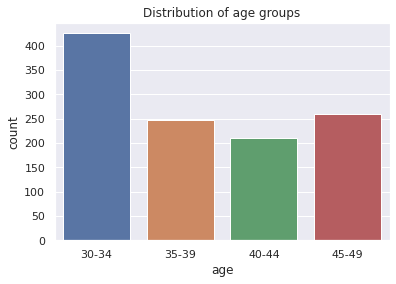

In [25]:
age_countplt = sns.countplot(x='age', data=df)
age_countplt.set_title('Distribution of age groups')

In [84]:
grouped_ages_id_sum = df.groupby(['age', 'xyz_campaign_id']).sum()
grouped_ages_id_sum['index_temp'] = grouped_ages_id_sum.index
grouped_ages_id_sum['Age'] = grouped_ages_id_sum['index_temp'].apply(lambda x: x[0])
grouped_ages_id_sum['xyz_campaign_id'] = grouped_ages_id_sum['index_temp'].apply(lambda x: x[1])
grouped_ages_id_sum = grouped_ages_id_sum.drop('index_temp', axis=1)
grouped_ages_id_sum

ad_id  fb_campaign_id  interest  Impressions  \
age   xyz_campaign_id                                                     
30-34 campaign_1        20578321         3017685       713       257672   
      campaign_2       157983271        22720666      5052      1655949   
      campaign_3       229655659        29840616      7365     66079398   
35-39 campaign_1         8517131         1249023       217        81076   
      campaign_2        71169071        10255156      2347      1111675   
      campaign_3       169305174        22070852      5836     40911893   
40-44 campaign_1         4260554          624844        94        61977   
      campaign_2        58982302         8608761      1692      1203597   
      campaign_3       149523440        19542152      5444     38338733   
45-49 campaign_1         4977971          730205       163        82200   
      campaign_2        82630696        11961153      2531      4156966   
      campaign_3       170855882        22293987      5998     59493692   

                       Clicks         Spent  Total_Conversion  \
age   xyz_campaign_id                                           
30-34 campaign_1           57     75.330000                31   
      campaign_2          286    391.440000               227   
      campaign_3         9140  14785.629986              1173   
35-39 campaign_1           17     23.640000                13   
      campaign_2          275    383.430001                96   
      campaign_3         6802  10705.359993               517   
40-44 campaign_1           14     16.810000                 7   
      campaign_2          311    450.400000                83   
      campaign_3         7411  11122.519981               433   
45-49 campaign_1           25     33.930000                 7   
      campaign_2         1112   1668.099997               131   
      campaign_3        12715  19048.639999               546   

                       Approved_Conversion    Age xyz_campaign_id  
age   xyz_campaign_id                                              
30-34 campaign_1                        11  30-34      campaign_1  
      campaign_2                        88  30-34      campaign_2  
      campaign_3                       395  30-34      campaign_3  
35-39 campaign_1                         6  35-39      campaign_1  
      campaign_2                        34  35-39      campaign_2  
      campaign_3                       167  35-39      campaign_3  
40-44 campaign_1                         4  40-44      campaign_1  
      campaign_2                        25  40-44      campaign_2  
      campaign_3                       141  40-44      campaign_3  
45-49 campaign_1                         3  45-49      campaign_1  
      campaign_2                        36  45-49      campaign_2  
      campaign_3                       169  45-49      campaign_3

In [94]:
grouped_ages_sum = df.groupby('age').sum()
grouped_ages_sum['age'] = grouped_ages_sum.index
grouped_ages_sum

,ad_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age
age,,,,,,,,,
30-34,408217251,55578967,13130,67993019,9483,15252.399986,1431,494,30-34
35-39,248991376,33575031,8400,42104644,7094,11112.429994,626,207,35-39
40-44,212766296,28775757,7230,39604307,7736,11589.729981,523,170,40-44
45-49,258464549,34985345,8692,63732858,13852,20750.669997,684,208,45-49


Text(0.5, 1.0, 'Conversion rate for each age group for each company')

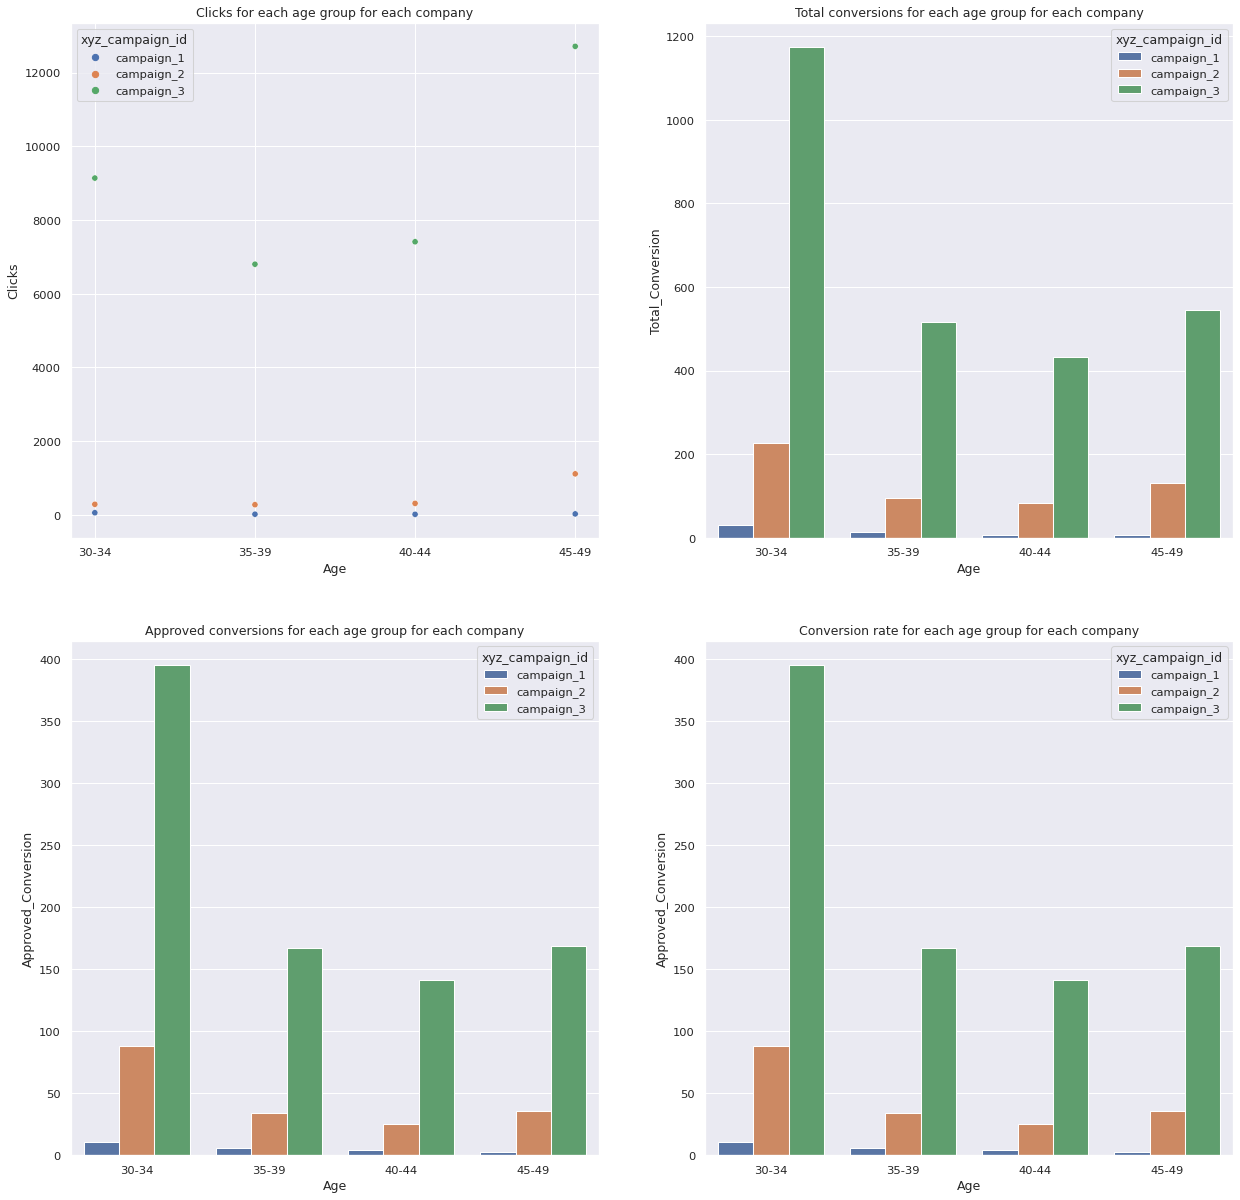

In [108]:
fig = plt.figure(figsize=(20,20), dpi=75)

ax = plt.subplot2grid((2,2),(0,0))
clicks_agesplt = sns.scatterplot(x='Age', y='Clicks', hue='xyz_campaign_id', data=grouped_ages_id_sum)
clicks_agesplt.set_title('Clicks for each age group for each company')

ax = plt.subplot2grid((2,2),(0,1))
clicks_agesplt = sns.barplot(x='Age', y='Total_Conversion', hue='xyz_campaign_id', data=grouped_ages_id_sum)
clicks_agesplt.set_title('Total conversions for each age group for each company')

ax = plt.subplot2grid((2,2),(1,0))
clicks_agesplt = sns.barplot(x='Age', y='Approved_Conversion', hue='xyz_campaign_id', data=grouped_ages_id_sum)
clicks_agesplt.set_title('Approved conversions for each age group for each company')

grouped_ages_sum['Conversion_Rate'] = grouped_ages_sum['Approved_Conversion'] / grouped_ages_sum['Total_Conversion']
ax = plt.subplot2grid((2,2),(1,1))
clicks_agesplt = sns.barplot(x='Age', y='Approved_Conversion', hue='xyz_campaign_id', data=grouped_ages_id_sum)
clicks_agesplt.set_title('Conversion rate for each age group for each company')

Text(0.5, 1.0, 'Conversion rate for each age group')

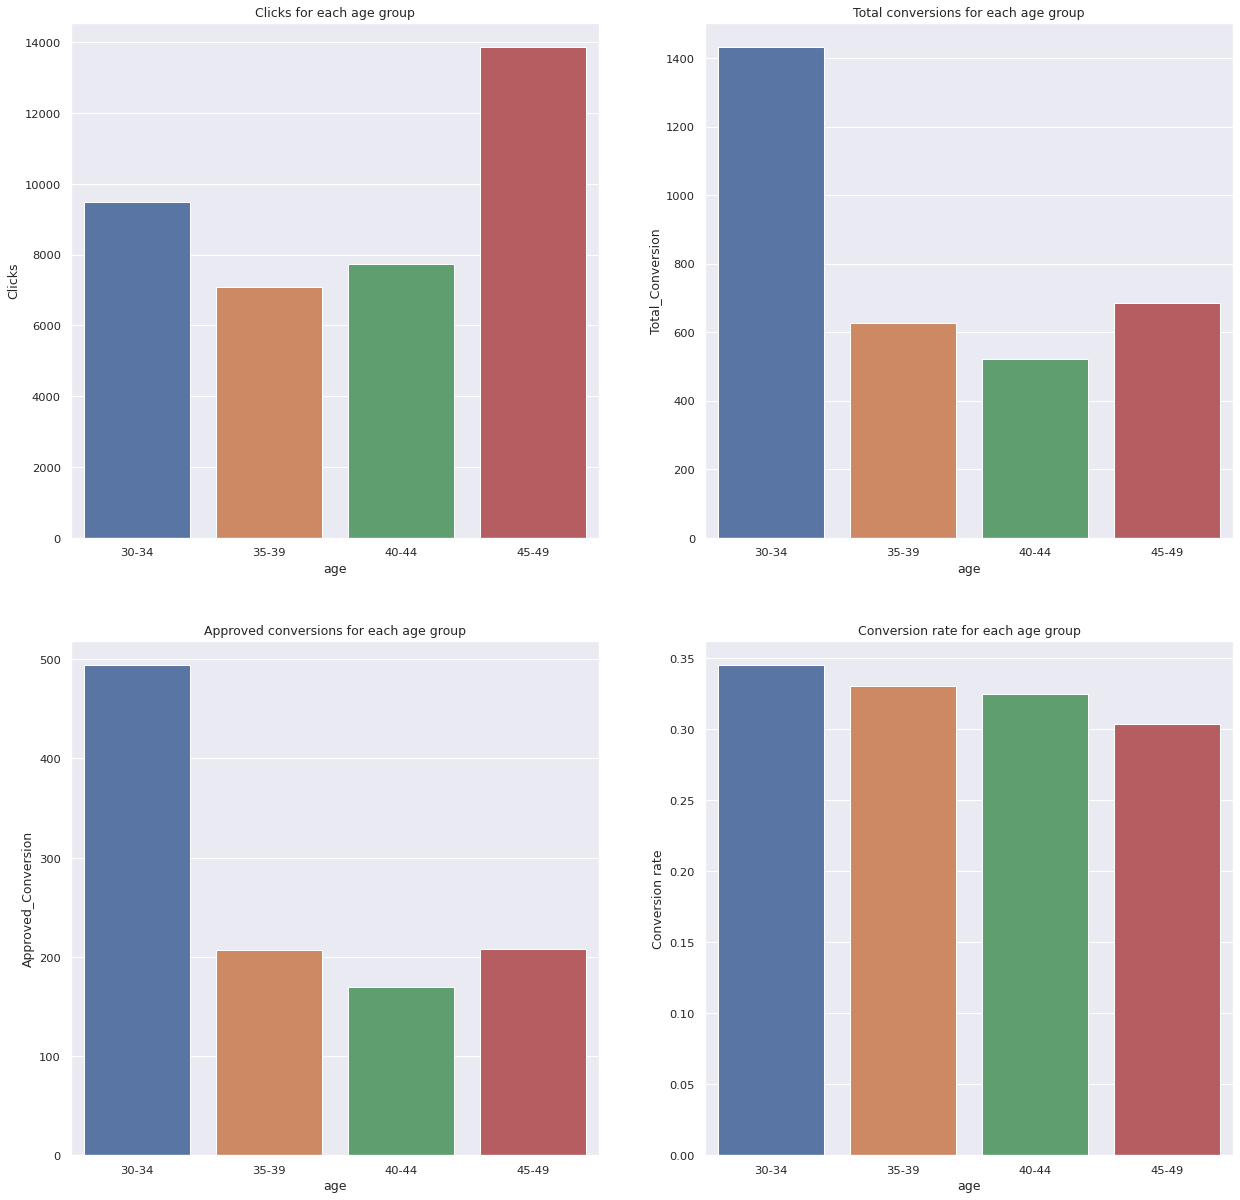

In [111]:
fig = plt.figure(figsize=(20,20), dpi=75)

ax = plt.subplot2grid((2,2),(0,0))
clicks_agesplt = sns.barplot(x='age', y='Clicks', data=grouped_ages_sum)
clicks_agesplt.set_title('Clicks for each age group')

ax = plt.subplot2grid((2,2),(0,1))
clicks_agesplt = sns.barplot(x='age', y='Total_Conversion', data=grouped_ages_sum)
clicks_agesplt.set_title('Total conversions for each age group')

ax = plt.subplot2grid((2,2),(1,0))
clicks_agesplt = sns.barplot(x='age', y='Approved_Conversion', data=grouped_ages_sum)
clicks_agesplt.set_title('Approved conversions for each age group')

ax = plt.subplot2grid((2,2),(1,1))
grouped_ages_sum['Conversion rate'] = grouped_ages_sum['Approved_Conversion'] / grouped_ages_sum['Total_Conversion'] 
clicks_agesplt = sns.barplot(x='age', y='Conversion rate', data=grouped_ages_sum)
clicks_agesplt.set_title('Conversion rate for each age group')

In [113]:
grouped_genders_id_sum = df.groupby(['gender', 'xyz_campaign_id']).sum()
grouped_genders_id_sum['index_temp'] = grouped_genders_id_sum.index
grouped_genders_id_sum['Age'] = grouped_genders_id_sum['index_temp'].apply(lambda x: x[0])
grouped_genders_id_sum['xyz_campaign_id'] = grouped_genders_id_sum['index_temp'].apply(lambda x: x[1])
grouped_genders_id_sum = grouped_genders_id_sum.drop('index_temp', axis=1)
grouped_genders_id_sum

ad_id  fb_campaign_id  interest  Impressions  \
gender xyz_campaign_id                                                     
F      campaign_1        13509671         1981658       501       197081   
       campaign_2       204333803        29519659      6533      6290206   
       campaign_3       319678160        41768506     11747    108375560   
M      campaign_1        24824306         3640099       686       285844   
       campaign_2       166431537        24026077      5089      1837981   
       campaign_3       399661995        51979101     12896     96448156   

                        Clicks         Spent  Total_Conversion  \
gender xyz_campaign_id                                           
F      campaign_1           52     69.850000                20   
       campaign_2         1633   2380.359999               302   
       campaign_3        22193  32052.409965              1322   
M      campaign_1           61     79.860001                38   
       campaign_2          351    513.010000               235   
       campaign_3        13875  23609.739994              1347   

                        Approved_Conversion Age xyz_campaign_id  
gender xyz_campaign_id                                           
F      campaign_1                         8   F      campaign_1  
       campaign_2                        96   F      campaign_2  
       campaign_3                       391   F      campaign_3  
M      campaign_1                        16   M      campaign_1  
       campaign_2                        87   M      campaign_2  
       campaign_3                       481   M      campaign_3

In [30]:
# Then I want to look at the gender counts

In [34]:
# Then I want to have a look at the interest comparison for both genders

In [31]:
# Then I want to look at the gender with the highest conversion count/rate

In [32]:
# Then I want to look at the gender with the highest conversion rate for each campaign

In [33]:
# Then I want to have a look at the interest